## Probabilidade
"Probabilidade ... é, portanto, simplesmente uma fração cujo numerador é o número de casos favoráveis e cujo denominador é o número de todos os casos possíveis ... quando nada nos leva a esperar que qualquer um desses casos ocorra mais do que qualquer outro. Pierre-Simon Laplace, 1814"

### Exemplos

#### (1) Qual a probabilidade de retirarmos duas cartas de paus (naipe) em um baralho (52 cartas) em 2 retiradas com reposicao (apos a retirada da carta, devolvemos ao baralho e reembaralhamos)?



In [1]:
# 52 cartas, 4 naipes, 13 cartas de cada naipe.
# Probabilidade de retirar apenas uma carta de paus é a proporção de paus no baralho 13/52 = 1/4.
# A probabilidade de retirar mais uma carta de paus do baralho, dado que foi reposta é 1/4 também.
# Como esses eventos são independentes (-> P(A∩B) = P(A) * P(B) <-) devemos multiplicar as duas
# probabilidades para ter a probabilidade final desses eventos acontecerem em sequência.
(1/4)*(1/4) # ou
(1/4)**2

0.0625

#### (2) E se nao devolvessemos a primeira carta ao baralho?

In [2]:
# a probabilidade de retirar a primeira carta de paus ainda é a mesma, 13/52. 
# mas dado que nosso espaço amostral muda em cada interação, quando formos retirar a segunda carta
# não mais estará dísponvivel as mesmas cartas e devemos ajustar isso nas contas:

probabilidade_primeiro_paus = (13/52)
# dado que saiu o primeiro paus, temos
paus_restantes = 13-1
cartas_restantes = 52-1

probabilidade_segundo_paus = paus_restantes/cartas_restantes

# como queremos a probabilidade de sair dois paus seguidos e esses eventos ainda são independentes:
probabilidade_primeiro_paus * probabilidade_segundo_paus

0.058823529411764705

#### (3) Paradoxo do aniversariante.
Quantas pessoas precisam ter em uma sala para que tenha pelo menos um par de aniversarios no mesmo dia?

In [3]:
import random

num_p = int(input("Digite o número de pessoas: "))
num_loops = int(input("Digite o número de repetições: ")) # num de testes
favoraveis = 0
for _ in range(num_loops):
    ani_dates = {random.randint(1, 366) for _ in range(num_p)} # sortear novo set de datas (dias) de aniversario
    if(len(ani_dates) != num_p): # se o comprimento do set for diferente do num de pessoas
        favoraveis += 1

probs_perc = (favoraveis/num_loops)*100
print('Em {} pessoas e {} testes deram-se {} vezes em que pelo menos duas pessoas fazem anos no mesmo dia, percentagem: {}%'.format(num_p, num_loops, favoraveis, probs_perc))

# Em 23 pessoas e 1000 testes deram-se 506 vezes em que pelo menos duas pessoas fazem anos no mesmo dia, percentagem: 50.6%

Digite o número de pessoas: 40
Digite o número de repetições: 10000
Em 40 pessoas e 10000 testes deram-se 8905 vezes em que pelo menos duas pessoas fazem anos no mesmo dia, percentagem: 89.05%


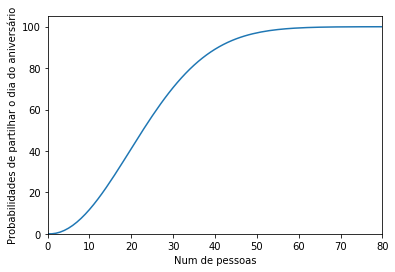

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def birthday_probs(x):
    p = (1.0/365)**x
    for i in range((366-x),366):
        p *= i
    return 1-p

plt.plot([birthday_probs(i)*100 for i in range(366)])
plt.xlabel("Num de pessoas")
plt.ylabel("Probabilidades de partilhar o dia do aniversário")
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=80)
plt.show()

### (4) Monty Hall

O problema de Monty Hall, também conhecido por paradoxo de Monty Hall é um problema matemático e paradoxo que surgiu a partir de um concurso televisivo dos Estados Unidos chamado Let’s Make a Deal, exibido na década de 1970.

O jogo consistia no seguinte: Monty Hall, o apresentador, apresentava três portas aos concorrentes. Atrás de uma delas estava um prêmio (um carro) e as outras duas dois bodes.

    Na 1.ª etapa o concorrente escolhe uma das três portas (que ainda não é aberta);
    Na 2.ª etapa, Monty abre uma das outras duas portas que o concorrente não escolheu, revelando que o carro não se encontra nessa porta e revelando um dos bodes;
    Na 3.ª etapa Monty pergunta ao concorrente se quer decidir permanecer com a porta que escolheu no início do jogo ou se ele pretende mudar para a outra porta que ainda está fechada para então a abrir.

Agora, com duas portas apenas para escolher — pois uma delas já se viu, na 2.ª etapa, que não tinha o prêmio — e sabendo que o carro está atrás de uma das restantes duas, o concorrente tem que tomar a decisão.


Qual é a estratégia mais lógica? Ficar com a porta escolhida inicialmente ou mudar de porta? Com qual das duas portas ainda fechadas o concorrente tem mais probabilidades de ganhar? Por quê?

<img src="img/bode.png" width="450" />


In [6]:
import random
print("""
This is the Monty Hall problem.
There are 3 doors in front of you, and there is a prize behind one of them.
Once you select a door, I will open one of the two you had not selected which does not have a prize behind it.
You will then have the opportunity to switch from the door you originally selected to an alternate door..
""")

A = "A"
B = "B"
C = "C"

doors = ["A", "B", "C"]

prize = random.choice(doors)

selection = str(input("Select door 'A', 'B', or 'C': "))

print("""
This problem relies on conditional probabilities.
It is suggested that you switch doors, you will have a higher probability of winning of you do.""")


if selection == prize:
    remaining = list(set(doors) - set(prize))
    open_door = random.choice(list(set(doors) - set(random.choice(remaining))))
    alternate = random.choice(list(set(doors) - set(open_door) - set(prize)))

else:
    open_door = random.choice(list(set(doors) - set(selection) - set(prize)))
    alternate = random.choice(
        list(set(doors) - set(open_door) - set(selection)))

print("The door I will now open is: %r" % open_door)

second_chance = str(input("Would you like to select the third door? Type 'Yes' or 'No': "))

if second_chance == "Yes":
    print("The door you will switch to is: %r " % alternate)

    if alternate == prize:
        print("Congrats, you win! The prize was behind the alternate, %r" % alternate)
    else:
        print ("Sorry, the prize was behind the original door %r" % prize)


if second_chance != "Yes":
    print("""You decided to keep your initial door, %r""" % selection)
    if selection != prize:
        print("""Sorry, the prize was behind the alternate door, %r""" % prize)
    else:
        print("Congrats, you win! The prize was behind your original selection, %r" % selection)


print("This is a check:")

print ("Prize: %r" % prize)
print ("Selection: %r " % selection)
print ("Alternate: %r " % alternate)
print ("Door opened: %r " % open_door)


This is the Monty Hall problem.
There are 3 doors in front of you, and there is a prize behind one of them.
Once you select a door, I will open one of the two you had not selected which does not have a prize behind it.
You will then have the opportunity to switch from the door you originally selected to an alternate door..

Select door 'A', 'B', or 'C': A

This problem relies on conditional probabilities.
It is suggested that you switch doors, you will have a higher probability of winning of you do.
The door I will now open is: 'C'
Would you like to select the third door? Type 'Yes' or 'No': Yes
The door you will switch to is: 'B' 
Congrats, you win! The prize was behind the alternate, 'B'
This is a check:
Prize: 'B'
Selection: 'A' 
Alternate: 'B' 
Door opened: 'C' 


In [ ]:
import argparse, random

def simulate(num_doors, switch, verbose):
    """(int, bool): bool

    Carry out the game for one contestant.  If 'switch' is True,
    the contestant will switch their chosen door when offered the chance.
    Returns a Boolean value telling whether the simulated contestant won.
    """

    # Doors are numbered from 0 up to num_doors-1 (inclusive).

    # Randomly choose the door hiding the prize.
    winning_door = random.randint(0, num_doors-1)
    if verbose:
        print('Prize is behind door {}'.format(winning_door+1))

    # The contestant picks a random door, too.
    choice = random.randint(0, num_doors-1)
    if verbose:
        print('Contestant chooses door {}'.format(choice+1))

    # The host opens all but two doors.
    closed_doors = list(range(num_doors))
    while len(closed_doors) > 2:
        # Randomly choose a door to open.
        door_to_remove = random.choice(closed_doors)

        # The host will never open the winning door, or the door
        # chosen by the contestant.
        if door_to_remove == winning_door or door_to_remove == choice:
            continue

        # Remove the door from the list of closed doors.
        closed_doors.remove(door_to_remove)
        if verbose:
            print('Host opens door {}'.format(door_to_remove+1))

    # There are always two doors remaining.
    assert len(closed_doors) == 2

    # Does the contestant want to switch their choice?
    if switch:
        if verbose:
            print('Contestant switches from door {} '.format(choice+1), end='')

        # There are two closed doors left.  The contestant will never
        # choose the same door, so we'll remove that door as a choice.
        available_doors = list(closed_doors) # Make a copy of the list.
        available_doors.remove(choice)

        # Change choice to the only door available.
        choice = available_doors.pop()
        if verbose:
            print('to {}'.format(choice+1))

    # Did the contestant win?
    won = (choice == winning_door)
    if verbose:
        if won:
            print('Contestant WON', end='\n\n')
        else:
            print('Contestant LOST', end='\n\n')
    return won


def monty_hall(doors=3, trials=1000, verbose=False):

    print('Simulating {} trials...'.format(trials))

    # Carry out the trials
    winning_non_switchers = 0
    winning_switchers = 0
    for i in range(trials):
        # First, do a trial where the contestant never switches.
        won = simulate(doors, switch=False, verbose=verbose)
        if won:
            winning_non_switchers += 1

        # Next, try one where the contestant switches.
        won = simulate(doors, switch=True, verbose=verbose)
        if won:
            winning_switchers += 1

    print('    Switching won {0:5} times out of {1} ({2}% of the time)'.format(
            winning_switchers, trials,
            (winning_switchers / trials * 100 ) ))
    print('Not switching won {0:5} times out of {1} ({2}% of the time)'.format(
            winning_non_switchers, trials,
            (winning_non_switchers / trials * 100 ) ))

In [ ]:
monty_hall(3, 100)

#### (5) Calculando pi com Monte Carlo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n=1e3
x = 1-2*np.random.random(int(n))
y = 1-2.*np.random.random(int(n))
insideX,  insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1]
outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1]

fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.scatter(insideX, insideY, c='b', alpha=0.8, edgecolor=None)
ax.scatter(outsideX, outsideY, c='r', alpha=0.8, edgecolor=None)
ax.set_aspect('equal')
fig.show()

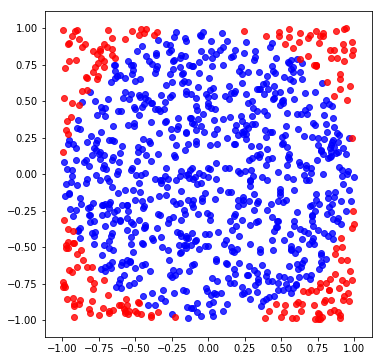

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n=1e3
x = 1-2*np.random.random(int(n))
y = 1-2.*np.random.random(int(n))
insideX,  insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1]
outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1]

fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.scatter(insideX, insideY, c='b', alpha=0.8, edgecolor=None)
ax.scatter(outsideX, outsideY, c='r', alpha=0.8, edgecolor=None)
ax.set_aspect('equal')
fig.show()